### 밀도함수 그래프 kdeplot
- kdeplot을 쓰면 등고선처럼 쓸수 있고 거기에 점도 찍을수 있음
- ax.text를 이용해서 글도 쓸수 있음

## Multiple bivariate KDE plots
* https://seaborn.pydata.org/examples/multiple_joint_kde.html
* [확률 밀도 함수 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%99%95%EB%A5%A0_%EB%B0%80%EB%8F%84_%ED%95%A8%EC%88%98)
* [Kernel density estimation - Wikipedia](https://en.wikipedia.org/wiki/Kernel_density_estimation)
* [Iris flower data set - Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)
* [로널드 피셔 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%A1%9C%EB%84%90%EB%93%9C_%ED%94%BC%EC%85%94)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
%matplotlib inline

In [3]:
iris = sns.load_dataset("iris")
print(iris.shape)

(150, 5)


In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Subset the iris dataset by species
setosa = iris.query("species == 'setosa'")
print(setosa.shape)
virginica = iris.query("species == 'virginica'")
print(virginica.shape)

(50, 5)
(50, 5)


In [6]:
setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [7]:
virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


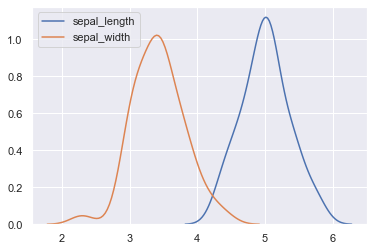

In [8]:
sns.kdeplot(setosa["sepal_length"])
sns.kdeplot(setosa["sepal_width"])

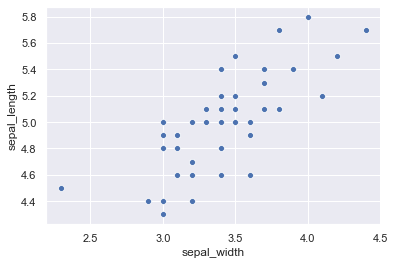

In [9]:
sns.scatterplot(data=setosa, x="sepal_width", y="sepal_length")

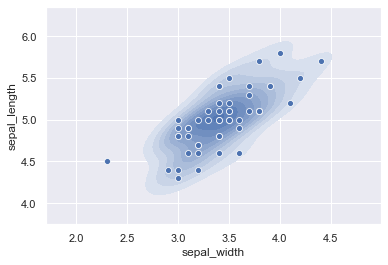

In [15]:
sns.kdeplot(setosa["sepal_width"], setosa["sepal_length"],
            shade=True,
           shade_lowest=False) # 바다처럼 그리기
sns.scatterplot(data=setosa, x="sepal_width", y='sepal_length')

Text(3.8, 4.5, 'setosa')

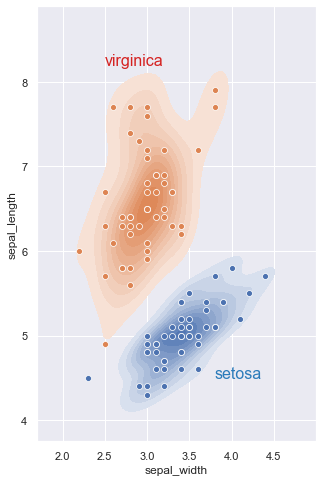

In [17]:
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

ax = sns.kdeplot(setosa["sepal_width"], setosa["sepal_length"], 
            shade=True,  # 바다처럼 그리기
            shade_lowest=False) # 배경이 없어지니까 scatterplot배경으로 나옴
sns.scatterplot(data=setosa, x="sepal_width", y="sepal_length")
ax = sns.kdeplot(virginica["sepal_width"], virginica["sepal_length"], 
            shade=True, shade_lowest=False)
sns.scatterplot(data=virginica, x="sepal_width", y="sepal_length")

ax.text(2.5, 8.2, "virginica", size=16, color=red) # 글씨 써주기
ax.text(3.8, 4.5, "setosa", size=16, color=blue)

Text(3.8, 4.5, 'setosa')

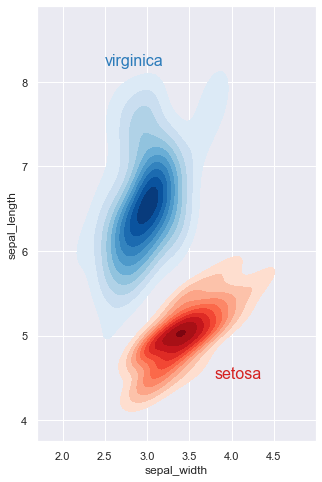

In [16]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)